In [20]:
import nltk
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.sentiment import SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

In [21]:
# visual
%config InlineBackend.figure_format = 'retina'
sns.set_context('notebook')

In [22]:
# read the file into a list for analysis
df = pd.read_excel('list.xlsx', sheet_name='Sheet1')
sen_list = []
for values in df.values:
    sen_list.append(values[0])
sen_list

["Do a little spring cleanin'",
 "I'm always too busy dreamin'",
 'Well, maybe I should wake up instead',
 'A lot of things I regret, but I just say I forget',
 "Why can't it just be easy?",
 'Why does everybody need me to stay?',
 "Oh, I hate the feelin'",
 "When you're high, but you're underneath the ceilin'",
 "Got the cards in my hand, I hate dealin', yeah",
 "Get everything I need, then I'm gone, but it ain't stealin'",
 'Can I get a break?',
 'I wish that I could just get out my goddamn way',
 'What is there to say?',
 "There ain't a better time than today",
 "Well, maybe I'll lay down for a little, yeah",
 "Instead of always tryin' to figure everything out",
 'And all I do is say sorry',
 "Half the time I don't even know what I'm sayin' it about",
 'Good news, good news, good news',
 "That's all they wanna hear",
 "No, they don't like it when I'm down",
 "But when I'm flyin', oh",
 "It make 'em so uncomfortable",
 "So different, what's the difference?",
 "When it ain't that bad"

In [23]:
# analyse each element of list and generate a compound value based on sentiment
compound_values = []
for sen in sen_list:
    compound_values.append(sia.polarity_scores(sen)["compound"])
 
print(compound_values)   

[0.0, 0.0, 0.2732, -0.5023, 0.4404, 0.0, -0.5719, 0.0, 0.1779, 0.0, 0.0, -0.1027, 0.0, -0.3412, 0.4601, 0.0, -0.0772, 0.0, 0.8271, 0.0, -0.5122, 0.0, -0.5214, 0.0, 0.431, -0.4767, 0.0, 0.4404, -0.647, 0.3612, -0.4118, 0.3591, 0.0, 0.7506, 0.0, 0.0, 0.0, 0.4215, -0.296, -0.4019, 0.8271, 0.0, -0.5122, 0.0, -0.5214, 0.0, 0.0, 0.3612, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.6908, 0.6059, 0.2235, -0.8262, -0.8262, 0.0, 0.0]


In [24]:
# create a new csv with the string + compound value
df_out = pd.DataFrame({"line": sen_list,
                      "compound_values": compound_values})
df_out.to_csv('out.csv', index=False)  

In [31]:
# print 5 highest and 5 lowest compound values
for i in range(5):
    highest_pos = sen_list[compound_values.index(max(compound_values))]
    lowest_pos = sen_list[compound_values.index(min(compound_values))]

    print(str(i) + "." + highest_pos + "/" + lowest_pos)
    compound_values.pop(compound_values.index(max(compound_values)))
    compound_values.pop(compound_values.index(min(compound_values)))

Maybe 'cause it ain't/Hope I make it home from work
That there's a whole lot more for me waitin'/Oh, I hate the feelin'
0.That there's a whole lot more for me waitin'/Oh, I hate the feelin'
1.I'll finally discover/No, they don't like it when I'm down
2.There ain't a better time than today/I heard they don't talk about me too much no more
3.Why can't it just be easy?/Half the time I don't even know what I'm sayin' it about
4.But when I'm flyin', oh/I just love the way it sound when I say it, yeah


<Axes: xlabel='Lyrics', ylabel='Sentiment Polarity'>

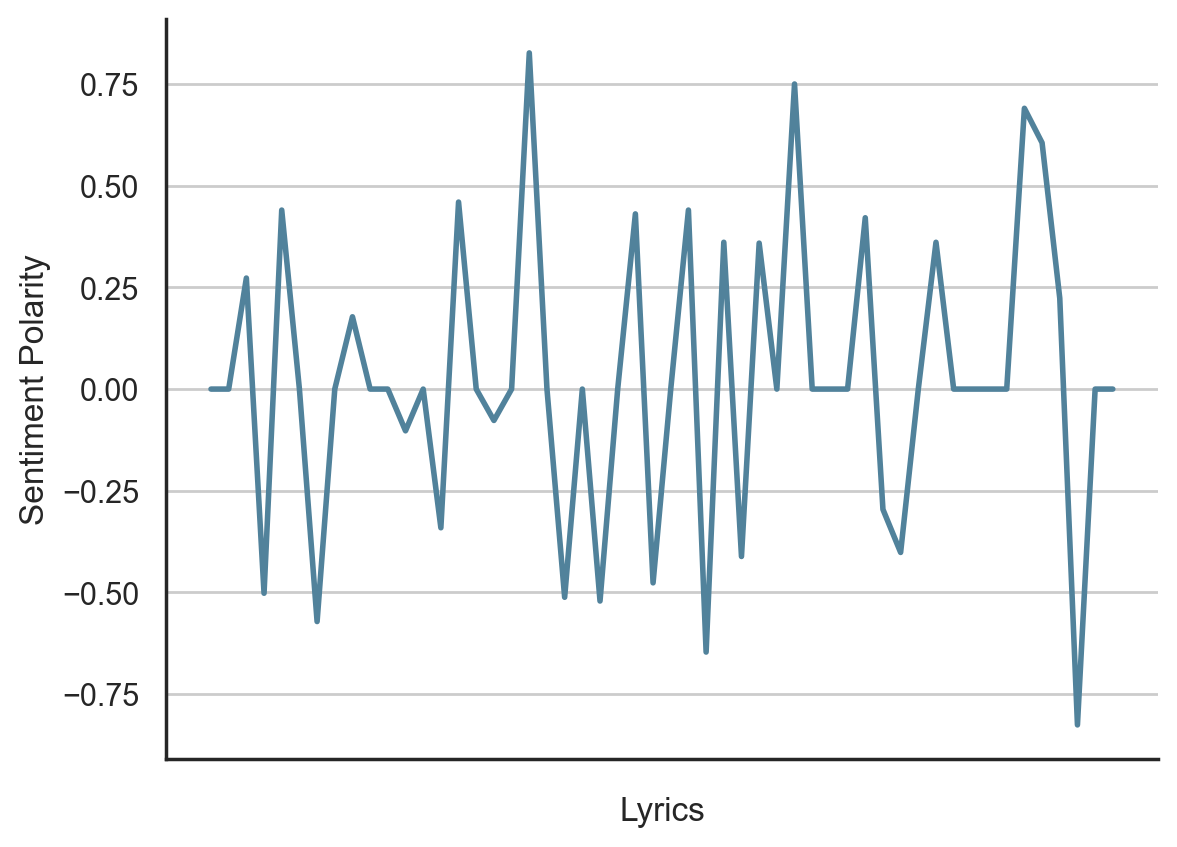

In [32]:
# create a line graph to visualize the ups and downs
line = sns.lineplot(x='line', 
                    y='compound_values', 
                    data=df_out,
                    color='#51829B',
                    linewidth=2)
line.set(xticklabels=[])
sns.despine()
sns.set_style("white")
line.grid(axis='y')
plt.xlabel('Lyrics')
plt.ylabel('Sentiment Polarity')
line